In [20]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
    


In [5]:
df = pd.read_excel("loan_prediction.csv.xlsx")


In [6]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
df.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
df.shape


(614, 13)

In [13]:
df.describe()
## Helps to get a general idea of the dataset

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [15]:
df.nunique()
## Useful to see how many categories they can be fit into


Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          5
Loan_Status            2
dtype: int64

In [17]:
df.isnull().sum()
## Useful to see the number of missing values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

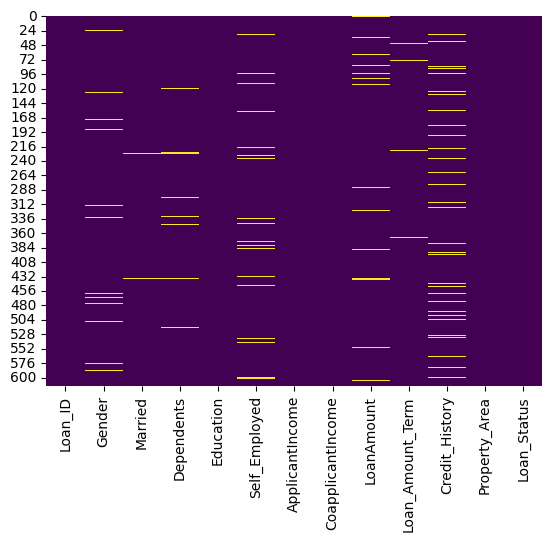

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()


In [21]:
loan_dataset = df.dropna()

In [22]:
loan_dataset.replace({"Loan_Status":{"N":0,"Y":1}},inplace = True)

C:\Users\GOKUL\AppData\Local\Temp\ipykernel_24804\2275664970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_dataset.replace({"Loan_Status":{"N":0,"Y":1}},inplace = True)


In [23]:
loan_dataset.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [24]:
loan_dataset['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [26]:
loan_dataset.replace(to_replace ='3+',value=4,inplace=True)

C:\Users\GOKUL\AppData\Local\Temp\ipykernel_24804\5423226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_dataset.replace(to_replace ='3+',value=4,inplace=True)


In [27]:
loan_dataset['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

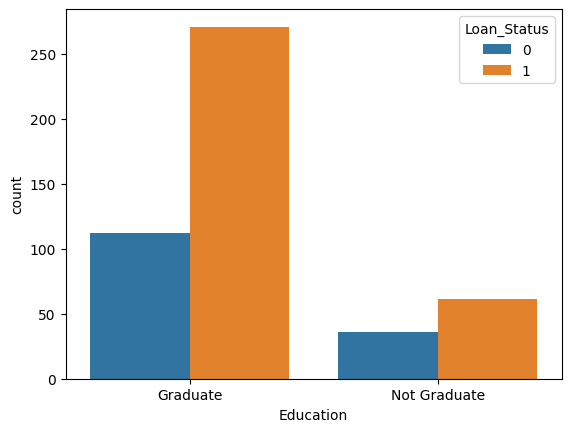

In [28]:
sns.countplot(x='Education',hue='Loan_Status',data = loan_dataset)

In [39]:
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Education':{'Graduate':1,'Not Graduate':0},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1}},inplace=True)

C:\Users\GOKUL\AppData\Local\Temp\ipykernel_24804\181784152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_dataset.replace({'Married':{'No':0,'Yes':1},'Education':{'Graduate':1,'Not Graduate':0},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1}},inplace=True)


In [40]:
loan_dataset['Property_Area'].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [38]:
mapping = {'semiurban':'Semiurban',
           'Semi-urban':'Semiurban'}

loan_dataset['Property_Area'] = loan_dataset['Property_Area'].map(mapping).fillna(loan_dataset['Property_Area'])

C:\Users\GOKUL\AppData\Local\Temp\ipykernel_24804\1044409363.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_dataset['Property_Area'] = loan_dataset['Property_Area'].map(mapping).fillna(loan_dataset['Property_Area'])


In [41]:
loan_dataset.replace({'Property_Area':{'Rural':0,'Urban':1,'Semiurban':2}},inplace=True)

C:\Users\GOKUL\AppData\Local\Temp\ipykernel_24804\845166569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_dataset.replace({'Property_Area':{'Rural':0,'Urban':1,'Semiurban':2}},inplace=True)


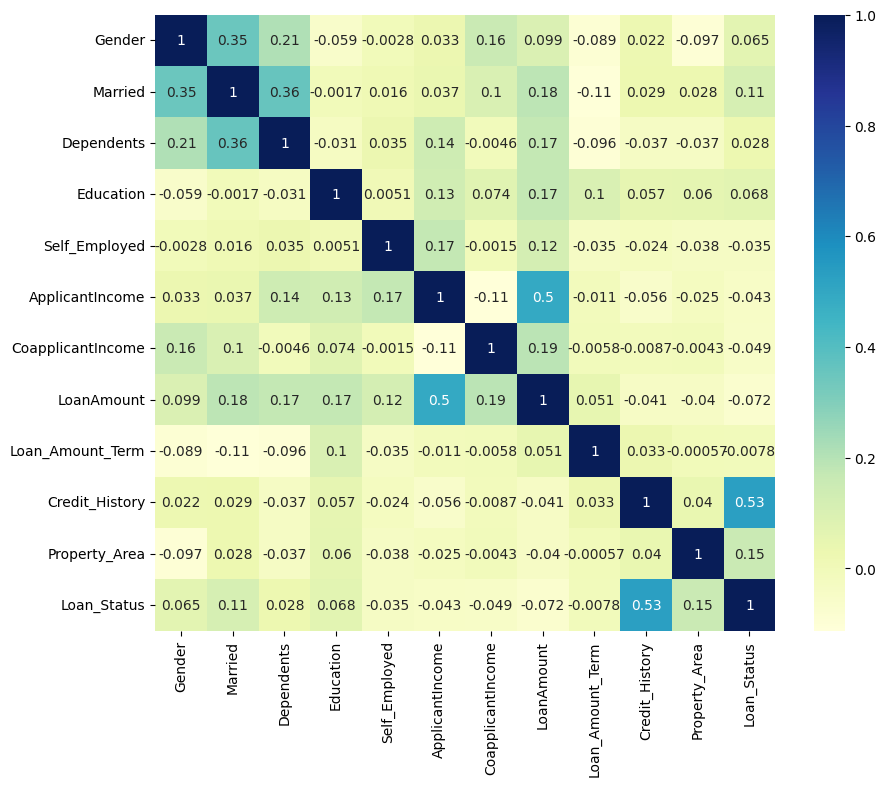

In [42]:
non_numeric_columns = loan_dataset.select_dtypes(include=['object']).columns

# Drop non-numeric columns
numeric_loan_dataset = loan_dataset.drop(columns=non_numeric_columns)

# Compute the correlation matrix
correlation_matrix = numeric_loan_dataset.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Optional: Adjust the size of the heatmap
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True)

# Display the heatmap
plt.show()

In [43]:
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y = loan_dataset['Loan_Status']

In [44]:
print(X)
print(y)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1           1          1              0             4583   
2         1        1           0          1              1             3000   
3         1        1           0          0              0             2583   
4         1        0           0          1              0             6000   
5         1        1           2          1              1             5417   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          1              0             2900   
610       1        1           4          1              0             4106   
611       1        1           1          1              0             8072   
612       1        1           2          1              0             7583   
613       0        0           0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.15,stratify=y,random_state=42 )

In [51]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((408, 11), (72, 11), (408,), (72,))

In [53]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [56]:
X_train_predicted = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_predicted,y_train)
print(training_data_accuracy)

0.7990196078431373


In [58]:
X_test_predicted = classifier.predict(X_test)
accuracy_test_data =  accuracy_score(X_test_predicted,y_test)
print(accuracy_test_data)

0.8194444444444444
